In [2]:
library("dplyr")
library("rcompanion")
library("car")
library("ggplot2")
library("IDPmisc")

In [3]:
credits <- read.csv("credits.csv")
titles <- read.csv("titles.csv")

In [ ]:
View(credits)
View(titles)

## Merge the 2 datasets together & Omit N/A values

In [7]:
hulu <- merge(credits,titles,by="id")
hulu1 <- NaRV.omit(hulu)
huluTV <- hulu1

### Run Correlation between variables

In [10]:
cor.test(hulu$imdb_score, hulu$tmdb_popularity, method="pearson")
cor.test(hulu1$imdb_score, hulu1$tmdb_popularity, method="pearson")


	Pearson's product-moment correlation

data:  hulu$imdb_score and hulu$tmdb_popularity
t = 16.24, df = 30635, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08127676 0.10348098
sample estimates:
       cor 
0.09239035 



	Pearson's product-moment correlation

data:  hulu1$imdb_score and hulu1$tmdb_popularity
t = 9.9791, df = 8818, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08499096 0.12626526
sample estimates:
      cor 
0.1056736 


# Explore Data

In [12]:
mean(huluTV$tmdb_popularity)
median(huluTV$tmdb_popularity)
range(huluTV$tmdb_popularity, na.rm=TRUE)

[1] 48.1846

[1] 20.072

[1]    0.600 2989.846

In [13]:
mean(huluTV$imdb_score)
median(huluTV$imdb_score)
range(huluTV$imdb_score, na.rm=TRUE)

[1] 7.311293

[1] 7.5

[1] 1.0 9.3

In [14]:
mean(huluTV$imdb_votes)
median(huluTV$imdb_votes)
range(huluTV$imdb_votes, na.rm=TRUE)

[1] 23999.2

[1] 5088

[1]      6 661972

In [15]:
mean(huluTV$seasons)
median(huluTV$seasons)
range(huluTV$seasons, na.rm=TRUE)

[1] 3.929138

[1] 2

[1]  1 63

In [16]:
huluTV  %>% group_by(type) %>% summarise(count = n())

type,count
<chr>,<int>
SHOW,8820


# ANOVA Analysis

### DV = season
### IV = imdb_score
### IV = tmdb_popularity
#### Make imdb_score into a categorical variable for the ANOVA analysis

In [17]:
huluTV$imdb_scoreCAT <- cut(huluTV$imdb_score, breaks=c(0, 3, 6, 10), labels=c(1, 2, 3))

#### Make tmdb_popularity into a categorical variable for the ANOVA analysis




In [18]:
huluTV$tmdb_popularityCATT <- cut(huluTV$tmdb_popularity, breaks=c(0, 1000, 2000, 3000), labels=c(1, 2, 3))

In [19]:
keeps2 <- c("title","imdb_score", "tmdb_popularity", "seasons", "imdb_scoreCAT")
huluTV1 <- huluTV[keeps2]

In [20]:
huluTV2 <- distinct(huluTV1)

In [21]:
nrow(huluTV)
nrow(huluTV2)

[1] 8820

[1] 1078

In [22]:
range(huluTV2$tmdb_popularity, na.rm=TRUE)

[1]    0.600 2989.846

In [23]:
huluTV2$tmdb_popularityCAT <- cut(huluTV2$tmdb_popularity, breaks=c(0, 100, 200, 500, 1000, 3000), labels=c(1, 2, 3, 4, 5))

## Assumptions

### Normality

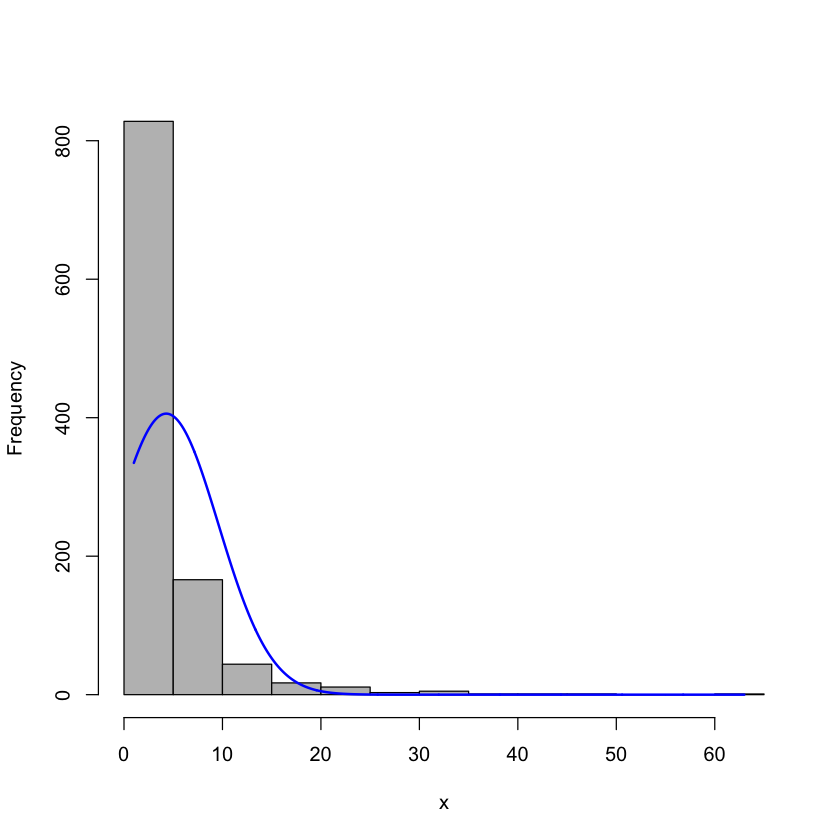

In [24]:
plotNormalHistogram(huluTV2$seasons)

In [25]:
huluTV2$seasonsLOG <- log(huluTV2$seasons)

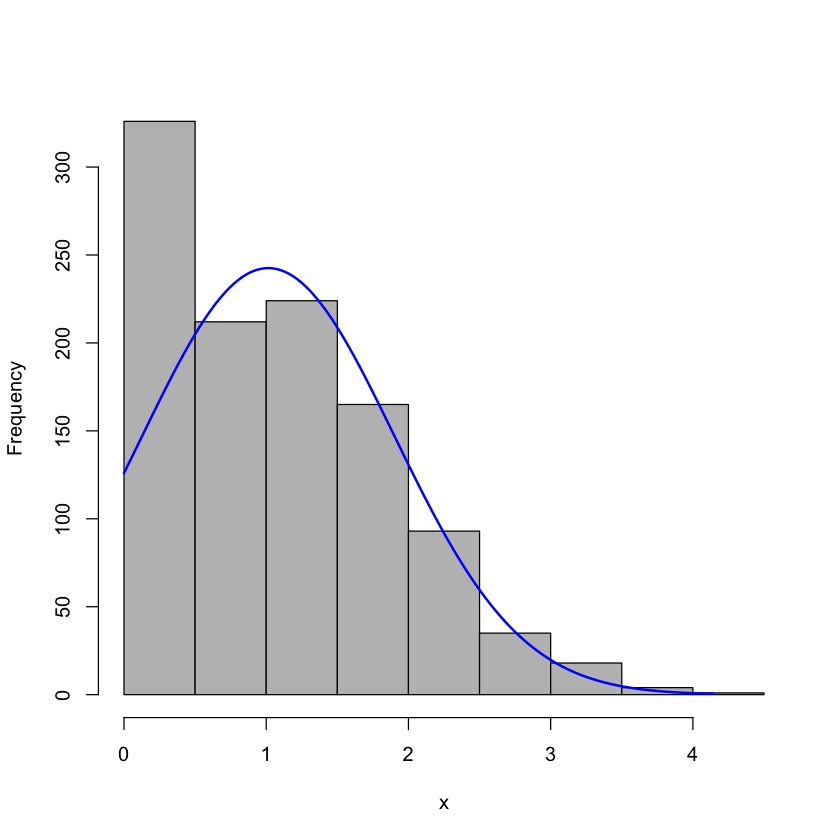

In [26]:
plotNormalHistogram(huluTV2$seasonsLOG)

#### We have violated Normality

## Homogeneity of Variance

In [27]:
bartlett.test(seasons ~ imdb_scoreCAT, data=huluTV2)


	Bartlett test of homogeneity of variances

data:  seasons by imdb_scoreCAT
Bartlett's K-squared = 50.953, df = 2, p-value = 8.623e-12


In [28]:
bartlett.test(seasons ~ tmdb_popularityCAT, data=huluTV2)


	Bartlett test of homogeneity of variances

data:  seasons by tmdb_popularityCAT
Bartlett's K-squared = 24.748, df = 4, p-value = 5.653e-05


#### We have violated the Homogeneity of Variance

## Run the ANOVA

#### IMDB Score

In [29]:
ANOVA <- lm(seasonsLOG ~ imdb_scoreCAT, data=huluTV2)
Anova(ANOVA, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
imdb_scoreCAT,2,1.5458,0.2136146
Residuals,1075,NA,NA


#### Our p-value is >0.05 so we can assume there is no significant affect that imdb_score has on the seasons for a show

#### TMDB Popularity

In [30]:
ANOVA2 <- lm(seasonsLOG ~ tmdb_popularityCAT, data=huluTV2)
Anova(ANOVA2, Type="II", white.adjust=TRUE)

Coefficient covariances computed by hccm()



,Df,F,Pr(>F)
,<dbl>,<dbl>,<dbl>
tmdb_popularityCAT,4,26.11604,1.09631e-20
Residuals,1073,NA,NA


#### Our p-value is <0.05 so we can assume there is a significant affect that tmdb_popularity has on the seasons of a show.

## **********

# Post Hoc

In [31]:
pairwise.t.test(huluTV2$seasons, huluTV2$imdb_scoreCAT, p.adjust="none")


	Pairwise comparisons using t tests with pooled SD 

data:  huluTV2$seasons and huluTV2$imdb_scoreCAT 

  1       2      
2 0.00024 -      
3 2.8e-05 0.04938

P value adjustment method: none 

#### IMDB Scores have an impact until they reach the higher scores, then seems to have little impact

In [32]:
pairwise.t.test(huluTV2$seasons, huluTV2$tmdb_popularityCAT, p.adjust="none")


	Pairwise comparisons using t tests with pooled SD 

data:  huluTV2$seasons and huluTV2$tmdb_popularityCAT 

  1       2      3      4     
2 2.3e-06 -      -      -     
3 3.0e-07 0.1154 -      -     
4 0.0018  0.0529 0.2088 -     
5 0.3092  0.8991 0.4553 0.1339

P value adjustment method: none 

#### Tmdb popularity has significant impact 200 and then after 1000.

# Conclusions

In [33]:
huluTVmean <- huluTV2 %>% group_by(imdb_scoreCAT) %>% summarize(Mean = mean(seasons))
huluTVmean

imdb_scoreCAT,Mean
<fct>,<dbl>
1,13.166667
2,5.093023
3,4.123012


In [34]:
huluTVmean2 <- huluTV2 %>% group_by(tmdb_popularityCAT) %>% summarize(Mean = mean(seasons))
huluTVmean2

tmdb_popularityCAT,Mean
<fct>,<dbl>
1,3.957704
2,7.388889
3,9.360000
4,13.333333
5,7.000000


# Final Conclusion
## imdb_scores: 1 = (0-3), 2 = (4-6), 3 = (7-10)
# Shows with a lower imdb_score tend to have more seasons on average

## tmdb_popularity: 1 = (0-100), 2 = (101-200), 3 = (201-500), 4 = (501-1000), 5 = (1001-3000)
# Shows ranked between 1000-3000 have significantly more seasons. Triple at the least the others at the very least.

# Export Data

## Separate data for export into Tableau & delete duplicate entries

## Scores

In [35]:
keeps <- c("title", "imdb_score", "seasons")
huluScores <- huluTV[keeps]

In [36]:
huluScores1 <- distinct(huluScores)

In [37]:
nrow(huluScores)
nrow(huluScores1)

[1] 8820

[1] 1078

In [38]:
huluScores2 <- arrange(huluScores1, desc(imdb_score))

In [ ]:
huluScoresLow <- arrange(huluScores1,asc(imdb_score))

### Bottom 10 by imdb score

In [52]:
huluScoresLow1 <- huluScoresLow[1:10,1:3]
View(huluScoresLow1)

,title,imdb_score,seasons
,<chr>,<dbl>,<dbl>
1,Attaway General,1.0,3
2,The Only Way Is Essex,2.2,28
3,The View,2.5,25
4,HobbyKids Adventures,2.7,2
5,Keeping Up with the Kardashians,2.7,20
6,The D'Amelio Show,2.7,1
7,The Bachelor,3.1,26
8,The Bachelorette,3.3,18
9,I Am Cait,3.5,2


### Top 10 by imdb score

In [39]:
huluScores3 <- huluScores2[1:10,1:3]
View(huluScores3)

,title,imdb_score,seasons
,<chr>,<dbl>,<dbl>
1,The Joy of Painting,9.3,31
2,9/11: One Day in America,9.3,1
3,Rick and Morty,9.2,5
4,Fullmetal Alchemist: Brotherhood,9.1,1
5,DEATH NOTE,9.0,1
6,Attack on Titan,9.0,4
7,Firefly,9.0,1
8,SPY x FAMILY,9.0,1
9,Hunter x Hunter,9.0,3


### Bottom 10 by Pop

In [54]:
huluPopLow <- arrange(huluPop1, tmdb_popularity)

In [55]:
huluPopLow1 <- huluPopLow[1:10,1:3]
View(huluPopLow1)

,title,tmdb_popularity,seasons
,<chr>,<dbl>,<dbl>
1,HobbyKids Adventures,0.600,2
2,A3,0.600,1
3,A Christmas Carol,0.600,1
4,Impossible Builds,0.600,1
5,Dead By Dawn,0.600,1
6,Psychic Kids,0.635,3
7,Littlekenny,0.644,1
8,Game Of Talents,0.682,1
9,Road Trip,0.728,2


## Popularity

In [40]:
keeps1 <- c("title", "tmdb_popularity", "seasons")

In [41]:
huluPop <- huluTV[keeps1]
huluPop1 <- distinct(huluPop)

In [42]:
nrow(huluPop)
nrow(huluPop1)

[1] 8820

[1] 1078

In [43]:
huluPop2 <- arrange(huluPop1, desc(tmdb_popularity))

### Top 10 by tmdb popularity

In [44]:
huluPop3 <- huluPop2[1:10,1:3]
View(huluPop3) 

,title,tmdb_popularity,seasons
,<chr>,<dbl>,<dbl>
1,Hidden Passion,2989.846,2
2,Grey's Anatomy,1215.393,18
3,SPY x FAMILY,1199.380,1
4,The Good Doctor,756.034,5
5,The Kardashians,681.069,1
6,The Simpsons,516.381,34
7,Law & Order: Special Victims Unit,451.723,24
8,S.W.A.T.,439.647,6
9,The Lord of the Skies,425.484,7


In [45]:
write.csv(huluTV2,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluTV.csv", row.names = FALSE)

In [46]:
write.csv(huluScores3,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluScores.csv", row.names = FALSE)

In [47]:
write.csv(huluPop3,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluPop.csv", row.names = FALSE)

In [56]:
write.csv(huluScoresLow,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluScoreLow.csv", row.names = FALSE)

In [57]:
write.csv(huluScoresLow1,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluScoreLow10.csv", row.names = FALSE)

In [60]:
write.csv(huluPopLow,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluPopLow.csv", row.names = FALSE)

In [61]:
write.csv(huluPopLow1,"C:\\Users\\michaelwilt\\Desktop\\Bethel\\Project\\Contest\\huluPopLow10.csv", row.names = FALSE)